In [ ]:
N = 200
gaussian_quantiles = sklearn.datasets.make_

In [12]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_gaussian_quantiles
import numpy as np

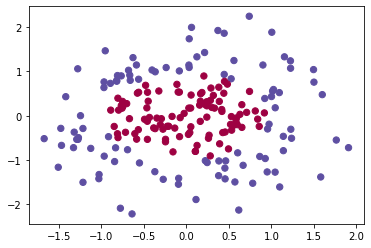

In [5]:
def load_extra_datasets():
    N = 200
    gaussian_quantiles = make_gaussian_quantiles(
        mean=None,
        cov=0.7,
        n_samples=N,
        n_features=2,
        n_classes=2,
        shuffle=True,
        random_state=None
    ) 
    return gaussian_quantiles 

gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0]) 
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral); 

In [10]:
print(Y)

[[0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
  1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1
  1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1
  0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0
  1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0
  0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0]]


In [11]:
# activation function
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

In [ ]:
# activation function
def tanh(x):
    return(1/(1 + np.exp(-x)))

In [14]:
# Converting inputs into numpy arrays
X1 = np.array(X[0, :])
X2 = np.array(X[1, :])
# Y remains the same

In [21]:
Y.shape[0]

1

In [27]:
n_x = X.shape[0] # size of input layer`
n_h = 4
n_y = Y.shape[0] # size of output layer

# np.random.randn(n_h,n_x) * 0.01
# np.random.randn(n_y,n_h) * 0.01
# n_y

2

In [54]:
input_length = 2
hidden1 = 3
hidden2 = 4
out = 1

w0 = np.random.randn(hidden1, input_length) * 0.01
b0 = np.zeros(shape=(hidden1, 1))

w1 = np.random.randn(hidden2, hidden1) * 0.01
b1 = np.zeros(shape=(hidden2, 1))

w2 = np.random.randn(out, hidden2) * 0.01
b2 = np.zeros(shape=(out, 1))

lr = 1

# Hidden Layer 1
temp1 = np.dot(w0, X) + b0
temp2 = sigmoid(temp1)

# Hidden Layer 2
temp3 = np.dot(w1, temp1) + b1
temp4 = np.tanh(temp3)

# Output Layer
temp5 = np.dot(w2, temp4) + b2
temp6 = sigmoid(temp5)

m = len(X[0]) # Size of Training Samples
logprobs = np.multiply(np.log(temp6), Y) + np.multiply((1 - Y), np.log(1 - temp6))

cost = - np.sum(logprobs) / m

# print("Cost: ", cost)

# Updating Bias and Weight 2
diff2 = temp6 - Y
dw2 = (1 / m) * np.dot(diff2, temp4.T)
db2 = (1 / m) * np.sum(diff2, axis=1, keepdims=True)

# Updating Bias and Weight 1
diff1 = np.multiply(np.dot(w2.T, diff2), 1 - np.power(temp4, 2))
dw1 = (1 / m) * np.dot(diff1, temp1.T)
db1 = (1 / m) * np.sum(diff1, axis=1, keepdims=True)

# Updating Bias and Weight 0
diff0 = np.multiply(np.dot(w1.T, diff1), 1 - np.power(temp2, 2))
dw0 = (1 / m) * np.dot(diff0, temp2.T)
db0 = (1 / m) * np.sum(diff0, axis=1, keepdims=True)

(1, 1)

In [66]:
# Input Layer: (1, 2)
# 2nd layer: Hidden layer 1(1, 3)
# 3rd layer: Hidden layer 2(1, 4)
# 4th layer: Output layer(1, 1)

# Length of Each Layer
input_length = 2
hidden1 = 3
hidden2 = 4
out = 1

# Randomizing Weights according to Layer Length

w0 = np.random.randn(hidden1, input_length) * 0.01
b0 = np.zeros(shape=(hidden1, 1))

w1 = np.random.randn(hidden2, hidden1) * 0.01
b1 = np.zeros(shape=(hidden2, 1))

w2 = np.random.randn(out, hidden2) * 0.01
b2 = np.zeros(shape=(out, 1))

# Learning Rate
lr = 1

# Training
for i in range(1000):
    
    
    # Hidden Layer 1
    temp1 = np.dot(w0, X) + b0 # Input Layer
    temp2 = sigmoid(temp1) # Output of Hidden Layer 1

    # Hidden Layer 2
    temp3 = np.dot(w1, temp2) + b1 # Input Layer for Hidden Layer 2
    temp4 = np.tanh(temp3) # Output of Hidden Layer 2

    # Output Layer
    temp5 = np.dot(w2, temp4) + b2 # Input for Output Layer
    temp6 = sigmoid(temp5) # Final Output

    m = len(X[0]) # Size of Training Samples
    logprobs = np.multiply(np.log(temp6), Y) + np.multiply((1 - Y), np.log(1 - temp6))
    cost = - np.sum(logprobs) / m

    print("Cost After Iteration %i: %f" %(i, cost))
    
    # Updating Bias and Weight 2
    diff2 = temp6 - Y
    dw2 = (1 / m) * np.dot(diff2, temp4.T)
    db2 = (1 / m) * np.sum(diff2, axis=1, keepdims=True)

    # Updating Bias and Weight 1
    diff1 = np.multiply(np.dot(w2.T, diff2), 1 - np.power(temp4, 2))
    dw1 = (1 / m) * np.dot(diff1, temp2.T)
    db1 = (1 / m) * np.sum(diff1, axis=1, keepdims=True)

    # Updating Bias and Weight 0
    diff0 = np.multiply(np.dot(w1.T, diff1), 1 - np.power(temp2, 2))
    dw0 = (1 / m) * np.dot(diff0, X.T)
    db0 = (1 / m) * np.sum(diff0, axis=1, keepdims=True)
    
    # Update the parameters
    w0 = w0 - lr * dw0
    b0 = b0 - lr * db0

    w1 = w1 - lr * dw1
    b1 = b1 - lr * db1

    w2 = w2 - lr * dw2
    b2 = b2 - lr * db2
    


Cost After Iteration 0: 0.693147


ValueError: operands could not be broadcast together with shapes (3,2) (4,2) 